# Работа с датасетом Ирис

Задача состоит в том, чтобы выполнить различные этапы анализа и предсказания типов ирисов, используя методы машинного обучения. Основные этапы работы:

1. **Получение датасета Ирис**

2. **Представление датасета в виде одномерных/двумерных массивов**:
   Признаки будут представлены как матрица размера `(n, 4)`, а типы ирисов будут представлены как вектор размера `n`. Также отобразим, сколько места занимает датасет.

3. **Нормализация данных**:
   Применим нормализацию, чтобы привести данные к диапазону от 0 до 1 для каждой из колонок признаков.

4. **Представление одного из признаков в виде категориальной переменной**:
   Один из признаков будет преобразован в категориальную переменную с тремя типами: `small`, `medium`, `big`, используя квантили (меньше 0.25 — small, от 0.25 до 0.75 — medium, больше 0.75 — big).

5. **Разделение датасета на две выборки (0.8/0.2)**:
   Для обучения модели будет использована 80% выборка, а для тестирования — 20%.

6. **Выбор и обучение модели классификации**:
   Выберем метод классификации (например, `SVC`), обучим модель на тренировочных данных и оценим её результат на тестовых данных. По итогам сделаем выводы о качестве классификации.

7. **Проведение трёх экспериментов**:
   Проведём три эксперимента, изменяя гиперпараметры модели или условия препроцессинга данных (например, использование нормализованных или ненормализованных данных). Сделаем выводы по результатам этих экспериментов.

8. **Визуализация данных с помощью методов уменьшения размерности**:
   С использованием методов уменьшения размерности визуализируем датасет, отображая его в виде scatter plot, где каждая точка соответствует одному ирису, её координаты — это признаки после сжатия размерности, а цвет точки — это тип ириса. Нарисуем графики дважды: для оригинальных данных и для предсказанных данных.

Выполняется с помощью numpy, sklearn и базовой функциональности python.

## 1. Получение датасета Ирис

Скачиваю указанный в задаче датасет Ирис и сохраняю локально как файл iris.csv :

In [264]:
import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
local_filename = "iris.csv"

urllib.request.urlretrieve(url, local_filename) 

('iris.csv', <http.client.HTTPMessage at 0x26bcb2d0fe0>)

## 2. Представление датасета в виде одномерных/двумерных массивов

Загружаю файл iris.csv, используя genfromtxt для пропуска пустых строк. Преобразую датасет в два массива: матрица признаков features и вектор названий классов labels. Посмотрим на размер массивов и занимаемое ими место:

In [265]:
import numpy as np

data = np.genfromtxt("iris.csv", delimiter=",", dtype=str, skip_header=0)

features = data[:, :-1].astype(float)  
labels = data[:, -1]                  

print(f"Размер матрицы признаков: {features.shape}")  
print(f"Размер вектора названий: {labels.shape}")     

features_memory = features.nbytes 
labels_memory = labels.nbytes      

print(f"\nМатрица признаков: {features_memory} байт.")
print(f"Вектор названий: {labels_memory} байт.")

Размер матрицы признаков: (150, 4)
Размер вектора названий: (150,)

Матрица признаков: 4800 байт.
Вектор названий: 9000 байт.


Видим, что размер матрицы 150×4 (т.е. n×4), размер вектора 150 (т.е. n). Матрица признаков занимает 4800 байт, вектор названий 9000 байт.

## 3. Нормализация данных

Нормализую данные в матрице признаков features, чтобы значения каждого признака (колонки) находились в промежутке от 0 до 1.

In [266]:
features_normalized = (features - features.min(axis=0)) / (features.max(axis=0) - features.min(axis=0))

print(features_normalized[:5])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


По первым 5 строкам видим, что данные нормализованы.

## 4. Представление одного из признаков в виде категориальной переменной

Преобразую первый признак (sepal length) в категориальную переменную на основе квантилей. Для этого вычисляю 25-й и 75-й квантили признака, чтобы разделить значения на три категории, и сохраняю эти категории в отдельной переменной categories (я не преобразовываю сам признак в категориальный тип, чтобы сохранить числовую информацию для дальнейшего анализа).

In [267]:
sepal_length  = features_normalized[:, 0]

q25 = np.percentile(sepal_length, 25)
q75 = np.percentile(sepal_length, 75)

categories = np.where(sepal_length < q25, 'small', np.where(sepal_length < q75, 'medium', 'big'))

print(features_normalized[:5, 0], categories[:5])
print(f"25-й квантиль: {q25}, 75-й квантиль: {q75}")

[0.22222222 0.16666667 0.11111111 0.08333333 0.19444444] ['medium' 'small' 'small' 'small' 'small']
25-й квантиль: 0.22222222222222213, 75-й квантиль: 0.5833333333333334


Видим, что в новую переменную правильно записываются категории, а также видим значения 25 и 75 квантилей.

## 5. Разделение датасета на две выборки (0.8/0.2)

Разделяю нормализованные данные на тренировочную и тестовую выборки в пропорции 80% и 20%. Для случайного распределения данных использую функцию np.random.permutation для создания случайно перемешанных индексов. Первые 80% строк использую для тренировочной выборки, оставшиеся 20% - для тестовой.

In [268]:
np.random.seed(42)

n_samples = features_normalized.shape[0]
indices = np.random.permutation(n_samples)

split_idx = int(0.8 * n_samples)
train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

features_train = features_normalized[train_indices]
features_test = features_normalized[test_indices]
labels_train = labels[train_indices]
labels_test = labels[test_indices]

## 6. Выбор и обучение модели классификации

Создаю и обучаю модель SVC на тренировочных данных. После этого оцениваю точность модели на тестовой выборке. Для оценки использую accuracy, а также вывожу classification_report, который показывает качество предсказаний по каждому классу.

In [269]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svc_model = SVC()

svc_model.fit(features_train, labels_train)
predictions = svc_model.predict(features_test)
accuracy = accuracy_score(labels_test, predictions)

print(f"Точность модели на тестовой выборке: {accuracy:.2f}")
print("\nКлассификационный отчёт:")
print(classification_report(labels_test, predictions))

Точность модели на тестовой выборке: 0.97

Классификационный отчёт:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## 7. Проведение трёх экспериментов

Проведем три эксперимента, изменяя гиперпараметры модели или условия препроцессинга данных, и сделаем выводы.

### Эксперимент 1: Использование ненормализованных данных
В этом эксперименте обучим модель SVC, используя исходные (ненормализованные) данные вместо нормализованных. Для этого восстановим ненормализованные данные из features_train и features_test, используя исходный массив features. Затем обучим модель SVC и оценим её качество.

In [270]:
features_train_raw = features_train * (features.max(axis=0) - features.min(axis=0)) + features.min(axis=0)
features_test_raw = features_test * (features.max(axis=0) - features.min(axis=0)) + features.min(axis=0)

svc_model_raw = SVC()
svc_model_raw.fit(features_train_raw, labels_train)
predictions_raw = svc_model_raw.predict(features_test_raw)
accuracy_raw = accuracy_score(labels_test, predictions_raw)

print(f"Точность: {accuracy_raw:.2f}")
print("Классификационный отчёт для ненормализованных данных:")
print(classification_report(labels_test, predictions_raw))

Точность: 0.97
Классификационный отчёт для ненормализованных данных:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Вывод: 
Результаты классификации для ненормализованных данных сходны с результатами для нормализованных. Это говорит о том, что в данном случае нормализация не оказывает значительного влияния на точность модели SVC.

### Эксперимент 2: Исключение одного из признаков
В этом эксперименте исключаем один из признаков — sepal width, оставляя только три признака для обучения модели. Проверим, как исключение части информации повлияет на качество классификации.

In [271]:
features_train_reduced = np.delete(features_train, 1, axis=1)
features_test_reduced = np.delete(features_test, 1, axis=1)

model_reduced = SVC()
model_reduced.fit(features_train_reduced, labels_train)
predictions_reduced = model_reduced.predict(features_test_reduced)
accuracy_reduced = accuracy_score(labels_test, predictions_reduced)

print(f"Точность: {accuracy_reduced:.2f}")
print("Классификационный отчёт:")
print(classification_report(labels_test, predictions_reduced))

Точность: 0.97
Классификационный отчёт:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Вывод:
Результаты эксперимента показывают, что точность классификации осталась неизменной (0.97) даже после удаления признака sepal width. Это может указывать на то, что данный признак незначительно влияет на результаты классификации, и модель может успешно работать без него.

### Эксперимент 3: Добавление случайного шума
В этом эксперименте добавляем случайный шум к нормализованным данным и обучаем модель на этих изменённых данных. Это добавляет случайные отклонения к каждому значению признаков в выборках. 

In [272]:
noise_train = np.random.normal(loc=0.0, scale=0.1, size=features_train.shape)
noise_test = np.random.normal(loc=0.0, scale=0.1, size=features_test.shape)

features_train_noisy = features_train + noise_train
features_test_noisy = features_test + noise_test

model_noisy = SVC()
model_noisy.fit(features_train_noisy, labels_train)

predictions_noisy = model_noisy.predict(features_test_noisy)
accuracy_noisy = accuracy_score(labels_test, predictions_noisy)

print(f"Точность: {accuracy_noisy:.2f}")
print("Классификационный отчёт:")
print(classification_report(labels_test, predictions_noisy))

Точность: 0.97
Классификационный отчёт:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Вывод:
Результаты эксперимента показали, что модель всё ещё достаточно устойчива к изменениям в данных, так как точность осталась на уровне 0.97, как и в предыдущих экспериментах. Это подтверждает, что выбранная модель может справляться с добавлением случайных отклонений в данные, не снижая качества классификации существенно. Однако при повторном выполнении ячейки точность может снижаться, так как при каждом запуске генерируется новый случайный шум.

## 8. Визуализация данных с помощью методов уменьшения размерности

Пользуясь методами уменьшения размерности, визуализируем датасет. Я буду пользоваться методом главных компонент (PCA). Создадим два scatter plot графика, на которых каждая точка будет представлять отдельный ирис. Для каждого графика координаты точек будут представлять признаки после сжатия размерности, а цвет точек будет отображать тип ириса.
- Первый график будет показывать истинные метки (типы ирисов) на основе оригинальных данных.
- Второй график будет показывать метки, полученные после предсказания модели на тех же данных.

### Первый график
Для первого графика использую PCA для сжатия размерности данных до 2-х компонент. На этом графике каждая точка представляет ирис, координаты точек — это сжатые признаки, а цвет точек соответствует типу ириса из оригинальных данных.

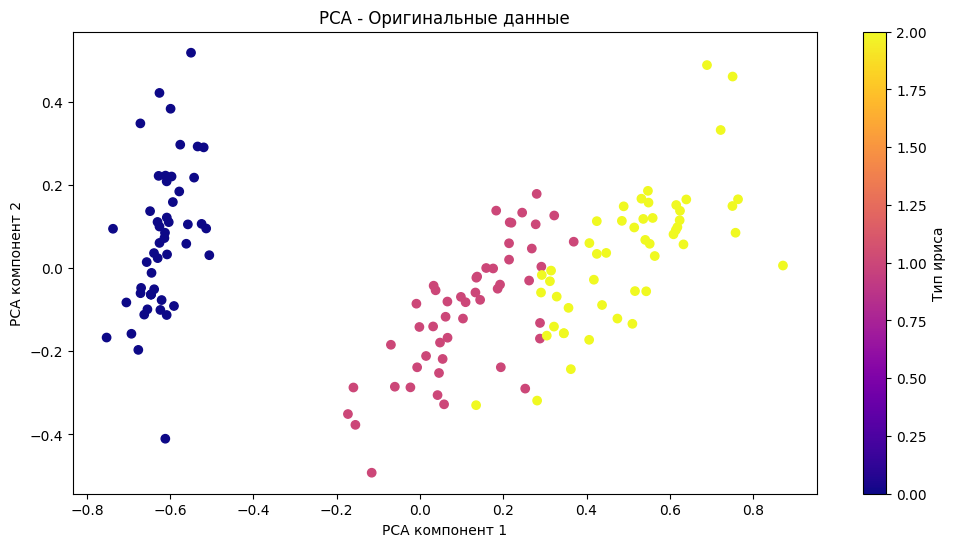

In [259]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_normalized)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

plt.figure(figsize=(12, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_encoded, cmap='plasma', marker='o')
plt.title("PCA - Оригинальные данные")
plt.xlabel("PCA компонент 1")
plt.ylabel("PCA компонент 2")
plt.colorbar(label="Тип ириса")

plt.show()

### Второй график
Для второго графика также применяю PCA к тем же данным, но теперь цвет точек соответствует предсказанным меткам типа ириса, полученным моделью. Хотим увидеть, насколько предсказания модели совпадают с истинными значениями.

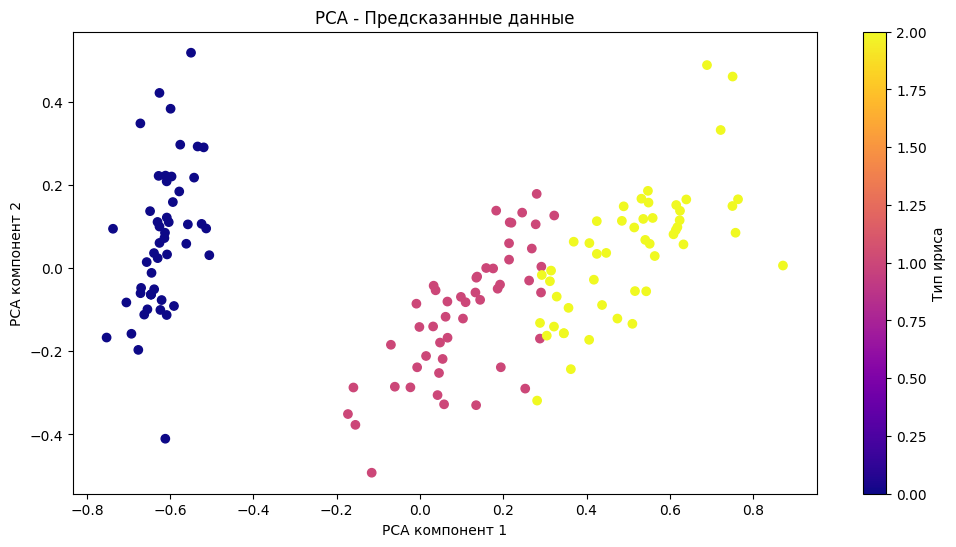

In [252]:
features_all_pca = pca.transform(features_normalized)
predictions_all = svc_model.predict(features_normalized)

predictions_encoded_all = label_encoder.transform(predictions_all)

plt.figure(figsize=(12, 6))


plt.scatter(features_all_pca[:, 0], features_all_pca[:, 1], c=predictions_encoded_all, cmap='plasma', marker='o')
plt.title("PCA - Предсказанные данные")
plt.xlabel("PCA компонент 1")
plt.ylabel("PCA компонент 2")
plt.colorbar(label="Тип ириса")

plt.show()

Результаты визуализации показывают, как модель классифицирует ирисы и как она справляется с предсказаниями. На первом графике распределение типов ирисов на основе оригинальных данных, а на втором — по предсказаниям модели. Видим, что графики практически идентичны, хотя и присутствуют небольшие различия, поэтому можем сделать вывод, что модель хорошо справляется с задачей классификации.